In [1]:
import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2021-11-23 17:01:30.401178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-23 17:01:30.401200: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
skim = pq.read_table("Skim.parquet")

In [3]:
df = skim.to_pandas()

In [4]:
print(df)

          weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0       0.000025 -1.084328 -2.974333   1.170820    0.710539 -1.437929   
1       0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
2       0.000025  0.967856 -2.416084   1.669004    1.108166  0.739856   
3       0.000025  0.786207  1.345999   1.321819    0.997364  1.138380   
4       0.000025  0.928688 -1.035375   2.569062    1.755869  0.060377   
...          ...       ...       ...        ...         ...       ...   
35143  18.784267  0.840179  2.400271   0.883476    0.642898 -0.600093   
35144  18.784267  0.053832  2.337113   0.497539    0.496819 -0.916470   
35145 -18.784267 -0.356669 -2.433177   1.043352    0.980332  0.485482   
35146  18.784267 -0.886677  2.579901   0.695736    0.490115  0.451536   
35147  18.784267 -0.637846 -0.242948   0.772736    0.638406 -0.202392   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...     pT_jet1  Eta_jet1  \
0      1.772228   1.521367    0.683855    

In [5]:
df["label"] = 0

In [6]:
print(df)

          weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0       0.000025 -1.084328 -2.974333   1.170820    0.710539 -1.437929   
1       0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
2       0.000025  0.967856 -2.416084   1.669004    1.108166  0.739856   
3       0.000025  0.786207  1.345999   1.321819    0.997364  1.138380   
4       0.000025  0.928688 -1.035375   2.569062    1.755869  0.060377   
...          ...       ...       ...        ...         ...       ...   
35143  18.784267  0.840179  2.400271   0.883476    0.642898 -0.600093   
35144  18.784267  0.053832  2.337113   0.497539    0.496819 -0.916470   
35145 -18.784267 -0.356669 -2.433177   1.043352    0.980332  0.485482   
35146  18.784267 -0.886677  2.579901   0.695736    0.490115  0.451536   
35147  18.784267 -0.637846 -0.242948   0.772736    0.638406 -0.202392   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...  Eta_jet1  Phi_jet1  \
0      1.772228   1.521367    0.683855    0.

In [7]:
df.loc[df.process.str.contains("HHH"), ['label']] = 1

In [8]:
print(df)

          weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0       0.000025 -1.084328 -2.974333   1.170820    0.710539 -1.437929   
1       0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
2       0.000025  0.967856 -2.416084   1.669004    1.108166  0.739856   
3       0.000025  0.786207  1.345999   1.321819    0.997364  1.138380   
4       0.000025  0.928688 -1.035375   2.569062    1.755869  0.060377   
...          ...       ...       ...        ...         ...       ...   
35143  18.784267  0.840179  2.400271   0.883476    0.642898 -0.600093   
35144  18.784267  0.053832  2.337113   0.497539    0.496819 -0.916470   
35145 -18.784267 -0.356669 -2.433177   1.043352    0.980332  0.485482   
35146  18.784267 -0.886677  2.579901   0.695736    0.490115  0.451536   
35147  18.784267 -0.637846 -0.242948   0.772736    0.638406 -0.202392   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...  Eta_jet1  Phi_jet1  \
0      1.772228   1.521367    0.683855    0.

In [9]:
input_vars=["Eta_ph1","Phi_ph1","E_mGG_ph1","pT_mGG_ph1","Eta_ph2","Phi_ph2","E_mGG_ph2","pT_mGG_ph2","Electron_E","Electron_pT","Electron_Eta","Electron_Phi","Muon_E","Muon_pT","Muon_Eta","Muon_Phi","nJets","E_jet1","pT_jet1","Eta_jet1","Phi_jet1","E_jet2","pT_jet2","Eta_jet2","Phi_jet2","InvM_jet","InvM_jet2" ]

In [10]:
print(df[input_vars])

        Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0     -1.084328 -2.974333   1.170820    0.710539 -1.437929  1.772228   
1      1.151401  2.699523   1.979170    1.137842  1.603054  1.725826   
2      0.967856 -2.416084   1.669004    1.108166  0.739856  2.725014   
3      0.786207  1.345999   1.321819    0.997364  1.138380  2.672149   
4      0.928688 -1.035375   2.569062    1.755869  0.060377  0.110630   
...         ...       ...        ...         ...       ...       ...   
35143  0.840179  2.400271   0.883476    0.642898 -0.600093 -1.504753   
35144  0.053832  2.337113   0.497539    0.496819 -0.916470 -1.062198   
35145 -0.356669 -2.433177   1.043352    0.980332  0.485482  1.024297   
35146 -0.886677  2.579901   0.695736    0.490115  0.451536 -0.773943   
35147 -0.637846 -0.242948   0.772736    0.638406 -0.202392  1.528199   

       E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
0       1.521367    0.683855    0.000000     0.000000  ...  1

In [14]:
df_clean = df[input_vars].copy()
df_clean["label"] = df.loc[:,"label"]
df_clean.to_csv("dataframe_HHWWgg.csv")


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[input_vars], df.label, 
                                                    test_size=0.33, random_state=42)

In [16]:
print(X_train)

          Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
4679     0.634377 -0.499179   0.659750    0.546125  0.275845  2.774763   
241600   0.429487 -2.601583   0.798719    0.730320  2.031048 -3.007747   
620205   1.369698  1.109080   1.653669    0.789652  0.522571 -2.983441   
1263992  1.271340 -0.908488   1.475363    0.767203  1.755248  2.141865   
432563  -0.923438  2.112059   1.027170    0.704728 -0.907636 -0.279159   
...           ...       ...        ...         ...       ...       ...   
110268  -2.009449  2.612750   1.996753    0.525927  0.102184  2.718325   
930514  -0.400803  0.474996   1.214496    1.123075 -0.707095  1.531702   
19552    1.377207  3.101519   0.571454    0.271082 -1.484963  2.958537   
97818   -0.835856  2.844183   0.767458    0.560129 -0.731319 -0.795591   
87844   -2.200770 -1.449984   4.228550    0.925013 -1.768163  1.205236   

         E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
4679      0.462302    0.445255    0

In [17]:
print(X_test)

          Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
1010628  0.083072  1.755365   1.436245    1.431303 -0.675643  0.924694   
34087   -2.339646  1.258837   2.960326    0.565275 -0.996654 -2.048956   
186768   2.006927 -1.234941   3.079467    0.813081  0.929087 -2.660279   
117724   1.145452 -3.102760   0.845905    0.488688 -0.499405  1.212202   
339864  -0.480081  1.226471   0.631833    0.565414  0.111381 -2.971822   
...           ...       ...        ...         ...       ...       ...   
2611     0.007983  2.573929   0.573402    0.573384 -0.747341 -0.477956   
405056   0.237674 -2.552902   2.072067    2.014889  0.890221 -2.338493   
59822   -2.406210  2.172845   2.820567    0.504483 -0.861537  0.485459   
796258   0.035370  1.086025   0.696687    0.696252 -0.338622 -0.744989   
572079  -0.582793 -2.776103   0.724027    0.616358  0.808433 -0.077441   

         E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
1010628   0.688656    0.556686  190

In [18]:
inputs = keras.Input(shape=(len(input_vars),), name="particles")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

2021-11-23 17:06:16.976001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-23 17:06:16.976053: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-23 17:06:16.976086: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1S0): /proc/driver/nvidia/version does not exist
2021-11-23 17:06:16.977131: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [20]:
X_val = X_train[-3000:]
y_val = y_train[-3000:]
X_train = X_train[:-3000]
y_train = y_train[:-3000]

In [21]:
print(X_train)

          Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
4679     0.634377 -0.499179   0.659750    0.546125  0.275845  2.774763   
241600   0.429487 -2.601583   0.798719    0.730320  2.031048 -3.007747   
620205   1.369698  1.109080   1.653669    0.789652  0.522571 -2.983441   
1263992  1.271340 -0.908488   1.475363    0.767203  1.755248  2.141865   
432563  -0.923438  2.112059   1.027170    0.704728 -0.907636 -0.279159   
...           ...       ...        ...         ...       ...       ...   
1131062  1.670547  2.647815   5.120059    1.860751  1.770081 -2.669773   
532086  -0.312885  2.565743   0.667585    0.636190 -1.421781 -1.439988   
86694    0.994331  0.066347   1.094928    0.712638  0.691225 -2.149711   
595868   2.177066 -1.311236   5.241989    1.173523  1.809512 -2.357152   
408465   1.194880  2.046280   2.005702    1.112455  0.578601  0.241719   

         E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...       E_jet1  \
4679      0.462302    0.445255    

In [22]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

2021-11-23 17:07:14.590880: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 342617040 exceeds 10% of free system memory.


Epoch 1/10
12393/12393 [==============================] - 15s 1ms/step - loss: 0.4403 - binary_accuracy: 0.8117 - val_loss: 0.3777 - val_binary_accuracy: 0.8373
Epoch 2/10
12393/12393 [==============================] - 14s 1ms/step - loss: 0.3650 - binary_accuracy: 0.8378 - val_loss: 0.3576 - val_binary_accuracy: 0.8403
Epoch 3/10
12393/12393 [==============================] - 14s 1ms/step - loss: 0.3571 - binary_accuracy: 0.8418 - val_loss: 0.3501 - val_binary_accuracy: 0.8467
Epoch 4/10
12393/12393 [==============================] - 14s 1ms/step - loss: 0.3533 - binary_accuracy: 0.8439 - val_loss: 0.3773 - val_binary_accuracy: 0.8380
Epoch 5/10
12393/12393 [==============================] - 14s 1ms/step - loss: 0.3497 - binary_accuracy: 0.8456 - val_loss: 0.3413 - val_binary_accuracy: 0.8503
Epoch 6/10
12393/12393 [==============================] - 15s 1ms/step - loss: 0.3466 - binary_accuracy: 0.8481 - val_loss: 0.3598 - val_binary_accuracy: 0.8487
Epoch 7/10
12393/12393 [==========

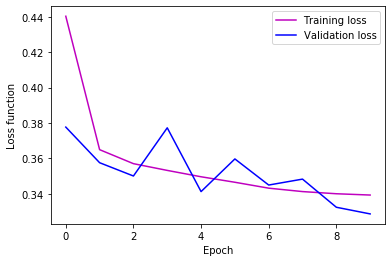

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
#plt.savefig('plots/2016_training_validation.pdf')
plt.show()

2021-11-23 17:10:45.668382: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169070976 exceeds 10% of free system memory.


[[0.35648388]
 [0.02290025]
 [0.15881765]
 ...
 [0.01607022]
 [0.09567147]
 [0.0035032 ]]


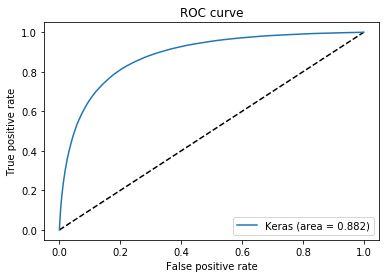

In [24]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

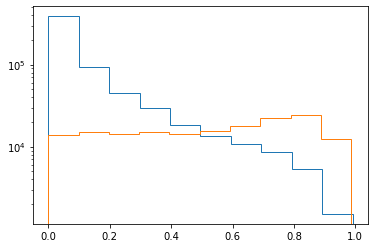

In [25]:
plt.hist(prediction[y_test==0],histtype=("step"));
plt.hist(prediction[y_test==1],histtype=("step"));
plt.yscale('log') 

In [26]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2021-11-23 17:11:31.265052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 169070976 exceeds 10% of free system memory.


24461/24461 - 14s - loss: 0.3359 - binary_accuracy: 0.8558 - 14s/epoch - 564us/step
binary_accuracy: 85.58%


In [27]:
# save model and architecture to single file
model.save("model_dnn")
print("Saved model to disk")

2021-11-23 17:12:14.624745: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_dnn/assets
Saved model to disk
